In [ ]:
!pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 kB 2.1 MB/s eta 0:00:00


In [ ]:
import json
from IPython.core.display import display, HTML
from google.colab import drive

import nltk
import re

from google.colab import data_table
import pandas as pd
import openpyxl

import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

from sklearn.model_selection import train_test_split


In [ ]:
# wrap text to the viewing window for this notebook
def set_css(): display(HTML('''<style>pre {white-space: pre-wrap;}</style>'''))
get_ipython().events.register('pre_run_cell', set_css)

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Code 1: Load the data
data_path = '/content/drive/MyDrive/Quran_df.xlsx'
data = pd.read_excel(data_path)

data.head()

,Token,POS Tag,Location,Sura Name
0,قد,CERT,T1A1S58J28,المجادلة
1,سمع,V,T2A1S58J28,المجادلة
2,الله,PN,T3A1S58J28,المجادلة
3,قول,N,T4A1S58J28,المجادلة
4,التي,REL,T5A1S58J28,المجادلة


In [ ]:
# Code 2: Mapping tokens to their corresponding location

def build_token_location_dict(df):
    token_location_dict = {row['Token']: row['Location'] for index, row in df.iterrows()}
    return token_location_dict
token_location_dict = build_token_location_dict(data)
list(token_location_dict.items())[:5]

[('قد', 'T1A9S91J30'),
 ('سمع', 'T2A1S58J28'),
 ('الله', 'T1A2S112J30'),
 ('قول', 'T4A25S74J29'),
 ('التي', 'T1A7S104J30')]

In [ ]:
# Code 3: Encoding the Sura name and ppending it as a tail to the token location.

def append_sura_code(df):
    # Generate a dictionary to map 'Sura Name' to a unique code (if not provided)
    sura_to_code = {sura: idx + 1 for idx, sura in enumerate(df['Sura Name'].unique())}

    # Apply the mapping to 'Location'
    df['Location'] = df['Sura Name'].map(sura_to_code).astype(str).radd('N').radd(df['Location'])

    # Output the updated DataFrame and the mapping dictionary for reference
    print(df.head())
    print('\nSura Codes Dictionary:', sura_to_code)

# Call the function
append_sura_code(data)


  Token POS Tag        Location Sura Name
0    قد    CERT  T1A1S58J28N1N1  المجادلة
1   سمع       V  T2A1S58J28N1N1  المجادلة
2  الله      PN  T3A1S58J28N1N1  المجادلة
3   قول       N  T4A1S58J28N1N1  المجادلة
4  التي     REL  T5A1S58J28N1N1  المجادلة

Sura Codes Dictionary: {'المجادلة': 1, 'الحشر': 2, 'الممتحنة': 3, 'الصف': 4, 'الجمعة': 5, 'المنافقون': 6, 'التغابن': 7, 'الطلاق': 8, 'التحريم': 9, 'الملك': 10, 'القلم': 11, 'الحاقة': 12, 'المعارج': 13, 'نوح': 14, 'الجن': 15, 'المزمل': 16, 'المدثر': 17, 'القيامة': 18, 'الإنسان': 19, 'المرسلات': 20, 'النبأ': 21, 'النازعات': 22, 'عبس': 23, 'التكوير': 24, 'الانفطار': 25, 'المطففين': 26, 'الانشقاق': 27, 'البروج': 28, 'الطارق': 29, 'الأعلى': 30, 'الغاشية': 31, 'الفجر': 32, 'البلد': 33, 'الشمس': 34, 'الليل': 35, 'الضحى': 36, 'الشرح': 37, 'التين': 38, 'العلق': 39, 'القدر': 40, 'البينة': 41, 'الزلزلة': 42, 'العاديات': 43, 'القارعة': 44, 'التكاثر': 45, 'العصر': 46, 'الهمزة': 47, 'الفيل': 48, 'قريش': 49, 'الماعون': 50, 'الكوثر': 51, 'الكافرون': 52,

In [ ]:
#### This is the same as the previous code by encoding the sura name with a rondom code
"""
import pandas as pd
def map_sura_names_to_codes(df, sura_to_code):
    df['Location'] = df.apply(lambda row: f"{row['Location']}N{sura_to_code[row['Sura Name']]}", axis=1)
    return df
    """

#sura_codes_dict = data['Sura Name'].value_counts().to_dict()

#print(sura_codes_dict)

'\nimport pandas as pd\ndef map_sura_names_to_codes(df, sura_to_code):\n    df[\'Location\'] = df.apply(lambda row: f"{row[\'Location\']}N{sura_to_code[row[\'Sura Name\']]}", axis=1)\n    return df\n    '

In [ ]:
# Code 4: Saving the updated DataFrame then loading it

data.to_excel("/content/drive/MyDrive/updated_Quran_df.xlsx", index=False)

# Load the updated df
df = pd.read_excel('/content/drive/MyDrive/updated_Quran_df.xlsx')
df.head()

,Token,POS Tag,Location,Sura Name
0,قد,CERT,T1A1S58J28N1,المجادلة
1,سمع,V,T2A1S58J28N1,المجادلة
2,الله,PN,T3A1S58J28N1,المجادلة
3,قول,N,T4A1S58J28N1,المجادلة
4,التي,REL,T5A1S58J28N1,المجادلة


In [ ]:
print("Unique Locations Sample:", df['Location'].unique()[:5])  # Check unique location formats
print(len(df['Location'].unique()))  # Check number of unique locations

Unique Locations Sample: ['T1A1S58J28N1' 'T2A1S58J28N1' 'T3A1S58J28N1' 'T4A1S58J28N1'
 'T5A1S58J28N1']
7627


In [ ]:
# Code 5: Tokenize the Locations

tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['Location'])
sequences = tokenizer.texts_to_sequences(df['Location'])

print("Sample Sequences:", sequences[:10])

Sample Sequences: [[1], [2], [3], [4], [5], [6], [7], [8], [9], [10]]


In [ ]:
# Code 6:

def create_sequences(locations):
    sequences = []
    for loc in locations:
        parts = [
            int(loc.split('T')[1].split('A')[0]),  # Token number
            int(loc.split('A')[1].split('S')[0]),  # Ayah number
            int(loc.split('S')[1].split('J')[0]),  # Sura number
            int(loc.split('J')[1].split('N')[0]),  # Juz' number
            int(loc.split('N')[1])                # Sura code (numerical)
        ]
        sequences.append(parts)
    return sequences

# Example usage:
sample_locations = df['Location'].tolist()[:10]  # Sample the first 10 locations for quick test
sample_sequences = create_sequences(sample_locations)
print("Sample Created Sequences:", sample_sequences)

Sample Created Sequences: [[1, 1, 58, 28, 1], [2, 1, 58, 28, 1], [3, 1, 58, 28, 1], [4, 1, 58, 28, 1], [5, 1, 58, 28, 1], [6, 1, 58, 28, 1], [7, 1, 58, 28, 1], [8, 1, 58, 28, 1], [9, 1, 58, 28, 1], [10, 1, 58, 28, 1]]


In [ ]:
# Code 7:
X = []
y = []

sequence_length = 5  # Number of steps in sequences

for i in range(len(sample_sequences) - sequence_length):
    X.append([seq for seq in sample_sequences[i:i+sequence_length]])
    y.append(sample_sequences[i+sequence_length])

X = np.array(X)  # Shape will be (number_of_sequences, sequence_length, 5 [features per step])
y = np.array(y)  # Shape will be (number_of_sequences, 5 [features per label])

print("X shape:", X.shape)
print("First Sequence in X:", X[0])
print("Corresponding Output in y:", y[0])

X shape: (5, 5, 5)
First Sequence in X: [[ 1  1 58 28  1]
 [ 2  1 58 28  1]
 [ 3  1 58 28  1]
 [ 4  1 58 28  1]
 [ 5  1 58 28  1]]
Corresponding Output in y: [ 6  1 58 28  1]


In [ ]:
# Code 8: Train-Test Split X and y

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Data Shape:", X_train.shape, y_train.shape)
print("Validation Data Shape:", X_val.shape, y_val.shape)

print(X_train[0])
print(y_train[0])

Training Data Shape: (4, 5, 5) (4, 5)
Validation Data Shape: (1, 5, 5) (1, 5)
[[ 5  1 58 28  1]
 [ 6  1 58 28  1]
 [ 7  1 58 28  1]
 [ 8  1 58 28  1]
 [ 9  1 58 28  1]]
[10  1 58 28  1]


In [ ]:
# Code 9: Flatten the last two dimensions of X_train and X_val

X_train_flat = X_train.reshape(X_train.shape[0], -1, 1)  # Reshaping to (num_samples, sequence_length * num_features, 1)
X_val_flat = X_val.reshape(X_val.shape[0], -1, 1)

print("New X_train shape:", X_train_flat.shape)
print("New X_val shape:", X_val_flat.shape)

print(X_train_flat[0])
print(y_train[0])

New X_train shape: (4, 25, 1)
New X_val shape: (1, 25, 1)
[[ 5]
 [ 1]
 [58]
 [28]
 [ 1]
 [ 6]
 [ 1]
 [58]
 [28]
 [ 1]
 [ 7]
 [ 1]
 [58]
 [28]
 [ 1]
 [ 8]
 [ 1]
 [58]
 [28]
 [ 1]
 [ 9]
 [ 1]
 [58]
 [28]
 [ 1]]
[10  1 58 28  1]


In [ ]:
# Code 10: Build and train the model

from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.preprocessing.sequence import pad_sequences

# Define model architecture
model = Sequential([
    LSTM(100, input_shape=(X_train_flat.shape[1], 1), return_sequences=True),
    LSTM(20),
    Dense(5, activation='linear')  # Predicting 5 features just like input
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_flat, y_train, epochs=20, batch_size=64, validation_data=(X_val_flat, y_val))

# Assuming X_val needs to be reshaped similarly to X_train_flat if not already done
X_val_flat = X_val.reshape(X_val.shape[0], -1, 1)  # Adjust this line according to your actual data dimensions

# Evaluate the model on the reshaped validation set
val_loss, val_accuracy = model.evaluate(X_val_flat, y_val)
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy * 100,"%")

NameError: name 'X_train_flat' is not defined

In [ ]:
# Code 11
# # Evaluate the model on the reshaped validation set
val_loss, val_accuracy = model.evaluate(X_val_flat, y_val)
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy * 100, "%")

1/1 [==============================] - 0s 29ms/step - loss: 775.9083 - accuracy: 1.0000
Validation Loss: 775.9083251953125
Validation Accuracy: 100.0 %


In [ ]:
# Code 12:

from tensorflow.keras.models import load_model
from keras.preprocessing.text import Tokenizer

model.save('my_model.h5', include_optimizer=True)
  # Creates a HDF5 file 'my_model.h5'

# Example loading data from an Excel file (modify the p
ath to where your dataset is located)
data_path = '/content/drive/MyDrive/updated_Quran_df.xlsx'  # Adjust this to the correct path
df = pd.read_excel(data_path)

# Extract the 'Token' column as a list
texts = df['Token'].tolist()  # Convert the 'Token' column to a list

# Create a tokenizer instance with a specified vocabulary size
tokenizer = Tokenizer(num_words=7628)  # Adjust 'num_words' as needed

# Fit the tokenizer on the texts
tokenizer.fit_on_texts(texts)

# Optionally, save the tokenizer for later use, similar to Code 12 in your model script
tokenizer_json = tokenizer.to_json()
with open('tokenizer.json', 'w', encoding='utf-8') as f:
    f.write(json.dumps(tokenizer_json, ensure_ascii=False))
    print("Tokenizer saved to 'tokenizer.json'.")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Tokenizer saved to 'tokenizer.json'.


In [ ]:
# Code 13: Load the model and tokenizer
from keras.models import load_model
from keras.preprocessing.text import tokenizer_from_json
import json

# Load the model
model = load_model('my_model.h5')

# Load tokenizer
with open('tokenizer.json') as f:
    data = json.load(f)
    tokenizer = tokenizer_from_json(data)

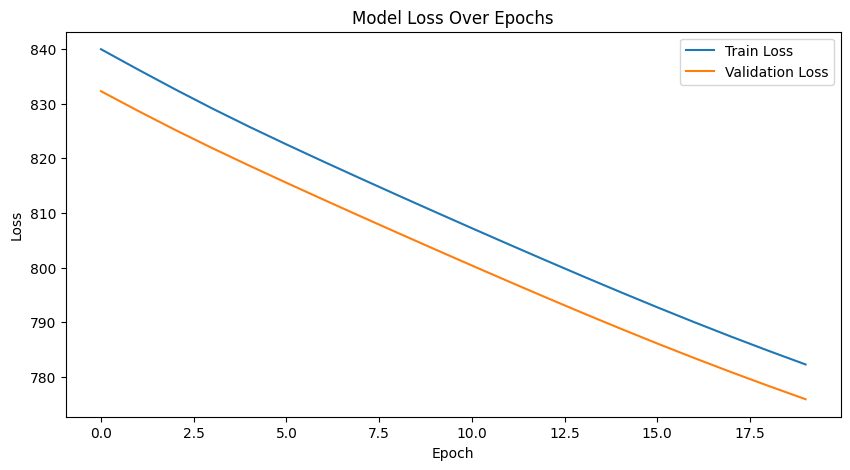

In [ ]:
# Code 14
import matplotlib.pyplot as plt

# Plotting training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


The graph shows the training and validation loss of the model over the epochs. The training loss generally decreases over time, while the validation loss initially decreases and then starts to increase slightly. This is a common phenomenon known as overfitting, where the model starts to memorize the training data too well and loses its ability to generalize to unseen data.

Based on the graph, we can conclude that the model is not performing optimally. While the training loss is decreasing, indicating the model is learning, the validation loss is increasing, indicating that the model is not generalizing well to unseen data.

To improve the model's performance, you can try the following techniques:

- **Increase the amount of training data:** This can help the model learn more general patterns and reduce overfitting.
- **Use regularization techniques:** Regularization techniques, such as L1 or L2 regularization, can help prevent the model from overfitting by penalizing large weights.
- **Reduce the model complexity:** Reducing the number of layers or the number of neurons in each layer can help prevent overfitting.
- **Use early stopping:** Early stopping can help prevent overfitting by stopping the training process before the model starts to overfit.

In [ ]:
# Code 15: Creating the metadata
# Extract components and add as separate columns for easy access
df['Token_Number'] = df['Location'].apply(lambda x: int(x.split('T')[1].split('A')[0]))
df['Ayah_Number'] = df['Location'].apply(lambda x: int(x.split('A')[1].split('S')[0]))
df['Sura_Number'] = df['Location'].apply(lambda x: int(x.split('S')[1].split('J')[0]))
df['Juz_Number'] = df['Location'].apply(lambda x: int(x.split('J')[1].split('N')[0]))

# Initialize metadata dictionaries
metadata = {
    'max_tokens_per_ayah': {},
    'max_ayahs_per_sura': {},
    'ayah_ends_at': {},
    'juz_ends_at': {}
}

# Populate metadata dictionaries
for index, row in df.iterrows():
    sura, ayah, token, juz = row['Sura_Number'], row['Ayah_Number'], row['Token_Number'], row['Juz_Number']

    if sura not in metadata['max_tokens_per_ayah']:
        metadata['max_tokens_per_ayah'][sura] = {}
    if sura not in metadata['max_ayahs_per_sura']:
        metadata['max_ayahs_per_sura'][sura] = 0

    metadata['max_ayahs_per_sura'][sura] = max(metadata['max_ayahs_per_sura'][sura], ayah)
    metadata['max_tokens_per_ayah'][sura][ayah] = max(metadata['max_tokens_per_ayah'][sura].get(ayah, 0), token)
    metadata['ayah_ends_at'][(sura, ayah)] = token  # Last token of each Ayah

    # Check and update the last token of Juz
    if juz not in metadata['juz_ends_at']:
        metadata['juz_ends_at'][juz] = (sura, ayah, token)
    else:
        current_end = metadata['juz_ends_at'][juz]
        if (sura > current_end[0]) or \
           (sura == current_end[0] and ayah > current_end[1]) or \
           (sura == current_end[0] and ayah == current_end[1] and token > current_end[2]):
            metadata['juz_ends_at'][juz] = (sura, ayah, token)

print("Metadata prepared for prediction adjustments.")

#print("Max Tokens per Ayah:", metadata['max_tokens_per_ayah'])
#print("Max Ayahs per Sura:", metadata['max_ayahs_per_sura'])

Metadata prepared for prediction adjustments.


In [ ]:
# Code 16:
import re

def parse_location(current_location):
    """
    Parses the location string into its component integers safely.

    Args:
    current_location (str): The location string in the format 'T#A#S#J#N#'.

    Returns:
    dict: A dictionary with keys 'Token_Number', 'Ayah_Number', 'Sura_Number', 'Juz_Number', and 'Sura_Code', representing their respective integers.
    """
    def safe_extract(pattern, text):
        """ Safely extracts first group using regex, returns 0 if no match is found """
        try:
            return int(re.search(pattern, text).group(1))
        except AttributeError:
            return 0  # Default value if pattern not found

    token_num = safe_extract('T(\d+)', current_location)
    ayah_num = safe_extract('A(\d+)', current_location)
    sura_num = safe_extract('S(\d+)', current_location)
    juz_num = safe_extract('J(\d+)', current_location)
    sura_code = safe_extract('N(\d+)', current_location)

    return {
        'Token_Number': token_num,
        'Ayah_Number': ayah_num,
        'Sura_Number': sura_num,
        'Juz_Number': juz_num,
        'Sura_Code': sura_code
    }

In [ ]:
# Code 17:
import tensorflow as tf
from keras.preprocessing.sequence import pad_sequences
from keras.models import load_model  # Assuming model is saved and needs to be loaded

def prepare_input_for_prediction(current_sequence, tokenizer, sequence_length=5, num_features=5):
    """
    Prepares the input for prediction by tokenizing and converting it into the appropriate tensor format.

    Args:
    current_sequence (str): Current Quranic location.
    tokenizer (Tokenizer): Tokenizer that was fitted on the locations.
    sequence_length (int): The expected length of sequences for the model.
    num_features (int): The number of features per sequence element.

    Returns:
    Tensor: A tensor shaped (1, sequence_length * num_features, 1) ready for model prediction.
    """
    # Tokenize the current sequence
    current_indices = tokenizer.texts_to_sequences([current_sequence])

    # Pad sequences to ensure consistent input size
    current_indices_padded = pad_sequences(current_indices, maxlen=sequence_length * num_features)

    # Convert padded sequences to tensor and reshape to fit the model's expected input shape
    current_indices_tensor = tf.convert_to_tensor(current_indices_padded, dtype=tf.float32)
    current_indices_tensor = tf.reshape(current_indices_tensor, (1, sequence_length * num_features, 1))

    return current_indices_tensor

def predict_next_location(current_indices_tensor, model):
    """
    Predicts the next location based on the model and the prepared tensor input.

    Args:
    current_indices_tensor (Tensor): The input tensor for the model.
    model (Model): The pre-loaded trained model.

    Returns:
    ndarray: The raw prediction output from the model.
    """
    # Predict using the pre-loaded model and the prepared input tensor
    return model.predict(current_indices_tensor)

In [ ]:
# Code 18

def format_predicted_location(current_features, predicted_features, metadata, df):
    current_token = current_features['Token_Number']
    current_ayah = current_features['Ayah_Number']
    current_sura = current_features['Sura_Number']
    current_juz = current_features['Juz_Number']
    current_sura_code = current_features['Sura_Code']  # This needs to be defined or fetched similarly

    # Calculate the predicted next token number based on the maximum tokens in the current Ayah
    max_tokens_in_ayah = metadata['max_tokens_per_ayah'][current_sura].get(current_ayah, 100)
    change_in_tokens = max(1, int(predicted_features[0] * max_tokens_in_ayah))
    next_token_number = current_token + change_in_tokens

    next_sura = current_sura
    next_ayah = current_ayah

    # Handling token overflow, move to next Ayah or Sura
    if next_token_number > max_tokens_in_ayah:
        next_ayah += 1
        next_token_number = 1  # Start at the first token of the next Ayah

        if next_ayah > metadata['max_ayahs_per_sura'].get(current_sura, 286):
            next_sura += 1
            next_ayah = 1  # Start at the first Ayah of the next Sura

            if next_sura > max(metadata['max_ayahs_per_sura'].keys()):  # Optional: Reset to first Sura
                next_sura = 1

    new_location = f"T{next_token_number}A{next_ayah}S{next_sura}J{current_juz}"

    # Extract the predicted token number, Ayah number, and Sura number from the new location
    predicted_token_number = int(new_location.split('T')[1].split('A')[0])
    predicted_ayah_number = int(new_location.split('A')[1].split('S')[0])
    predicted_sura_number = int(new_location.split('S')[1].split('J')[0])

    # Filter the dataset based on the predicted Sura number, Ayah number, and Token number
    filtered_df = df[(df['Sura_Number'] == predicted_sura_number) &
                     (df['Ayah_Number'] == predicted_ayah_number) &
                     (df['Token_Number'] == predicted_token_number)]

    # Get the text token corresponding to the predicted location
    if not filtered_df.empty:
        text_token = filtered_df.iloc[0]['Token']  # Assuming 'Token' is the column containing text tokens
        return new_location, text_token
    else:
        return new_location, None

# Example usage
current_features = {
    'Token_Number': 4,  # from 'T3'
    'Ayah_Number': 3,   # from 'A1'
    'Sura_Number': 106,  # from 'S58'
    'Juz_Number': 30,   # from 'J28'
    'Sura_Code': 49    # from 'N48'
}

predicted_features = [0.09] # This is an example prediction that should be the output of your model
next_location, text_token = format_predicted_location(current_features, predicted_features, metadata, df)
if text_token is not None:
    print("\nPredicted Next Token:", text_token, ", === Location ===>", next_location)
else:
    print("No corresponding text token found.")

next_ayah = int(next_location.split('A')[1].split('S')[0])
next_sura = int(next_location.split('S')[1].split('J')[0])
sura_name = df[df['Sura_Number'] == next_sura]['Sura Name'].iloc[0]

print()
print("Sura Name:سورة", sura_name)
print("Token Number:", next_location.split('T')[1].split('A')[0])
print("Ayah Number:", next_location.split('A')[1].split('S')[0])
print("Sura Number:", next_location.split('S')[1].split('J')[0])
print("Juz Number:", next_location.split('J')[1])



Predicted Next Token: الذي , === Location ===> T1A4S106J30

Sura Name:سورة قريش
Token Number: 1
Ayah Number: 4
Sura Number: 106
Juz Number: 30
